# XGBoost - Bike Sharing (Regression)
[ch1-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch1-gradient-boosting.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [5]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

In [6]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [7]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.682627,1.395349,0.495423,0.474391,0.627908,0.190411,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465773,0.544894,0.183023,0.162938,0.142074,0.077462,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180971,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.729791,0.233206,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [8]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    float64
 2   yr          731 non-null    float64
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    float64
 5   weekday     731 non-null    float64
 6   workingday  731 non-null    float64
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 74.4 KB


### 누락한값이 있는지 확인

In [9]:
df_bikes.isna().sum().sum()

0

## Define Feature and Target

In [10]:
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

In [11]:
pd.DataFrame(y).head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


## Regression Model Selection

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score

# kfold = KFold(n_splits=5, shuffle=True, random_state=2)
# kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    # scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

    rmse = np.sqrt(-scores)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('RMSE:', np.round(rmse, 3))
    print('Avg. RMSE: %0.3f' % (rmse.mean()))

In [13]:
cross_validation(XGBRegressor(booster='gbtree'))

Cross Validation:
Elased time: 3.30s
RMSE: [ 717.646  692.804  520.7    737.676  835.961 1006.237  991.342  747.612
  891.994 1731.128]
Avg. RMSE: 887.310


In [14]:
cross_validation(XGBRegressor(booster='gblinear'))

Cross Validation:
Elased time: 2.46s
RMSE: [1.11794800e+30 3.92551254e+26 1.72277105e+30 1.61191075e+30
 1.27281475e+30 8.58465058e+29 2.34002467e+29 2.03380033e+29
 1.18886296e+29 7.13940455e+29]
Avg. RMSE: 785451141213660627422796578816.000


In [15]:
cross_validation(XGBRegressor(booster='dart', one_drop=1))

Cross Validation:
Elased time: 6.18s
RMSE: [ 574.362  589.35   523.466  718.081  833.296 1075.336  963.095  754.554
  843.255 1762.242]
Avg. RMSE: 863.704


In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression

cross_validation(LinearRegression())

Cross Validation:
Elased time: 0.05s
RMSE: [ 504.007  840.55  1140.882  728.392  640.197  969.949 1133.448 1252.847
 1084.636 1425.326]
Avg. RMSE: 972.023


In [17]:
from sklearn.linear_model import Lasso

cross_validation(Lasso())

Cross Validation:
Elased time: 0.09s
RMSE: [ 491.917  830.768 1133.671  731.759  632.751  963.02  1139.191 1244.107
 1065.067 1463.133]
Avg. RMSE: 969.538


In [18]:
from sklearn.linear_model import Ridge

cross_validation(Ridge())

Cross Validation:
Elased time: 0.08s
RMSE: [ 487.127  824.751 1098.441  735.696  632.238  969.021 1146.207 1226.545
 1036.396 1491.762]
Avg. RMSE: 964.818


In [19]:
from sklearn.ensemble import RandomForestRegressor

cross_validation(RandomForestRegressor())

Cross Validation:
Elased time: 2.96s
RMSE: [ 794.724  523.01   524.54   806.661  858.925  889.711  825.554  799.586
  777.23  2100.833]
Avg. RMSE: 890.077


## HPO

### Default

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# Utility function to estimate accuracy scores
def model_estimation(model):    
    y_pred = model.predict(X_test)

    reg_mse = mean_squared_error(y_test, y_pred)
    reg_rmse = np.sqrt(reg_mse)

    print('RMSE: %0.3f' % (reg_rmse))   
    
    return reg_rmse

In [21]:
# n_estimators
param = 'n_estimators'
values = [50, 100, 200, 400, 800]
best_param = 0
best_score = 1e9
cnt = 0
start = time.time()

for value in values:
    start = time.time()
    
    xgb = XGBRegressor(booster='gbtree', n_estimators=value, 
                       random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    reg_mse = mean_squared_error(y_test, y_pred)
    reg_rmse = np.sqrt(reg_mse)
    
    if best_score > reg_rmse:
        best_score = reg_rmse
        best_param = cnt

    print('RMSE: %0.3f' % (reg_rmse))
    cnt = cnt + 1

print('Elapsed time: %0.2fs' % (time.time()-start))            
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score))
print('best param: ', values[best_param])

RMSE: 704.709
RMSE: 705.114
RMSE: 704.883
RMSE: 704.872
RMSE: 704.872
Elapsed time: 2.36s

Elased time: 2.36s
best score: 704.71
best param:  50


In [22]:
# basic model
model = XGBRegressor(booster='gbtree', random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

best_rmse = model_estimation(model)
best_model = model

print('\nbest_score: %0.3f' % (best_rmse))

RMSE: 705.114

best_score: 705.114


In [23]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score(=RMSE): {0:.3f}".format(
                    np.sqrt(-results["mean_test_score"][candidate]),
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

## HPO: Randomized Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBRegressor(booster='gbtree', random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    
    rand_reg = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='neg_mean_squared_error')
    
    rand_reg.fit(X_train, y_train)    
    
    best_model = rand_reg.best_estimator_    
    
    print("best parameter:", rand_reg.best_params_)
    
    rmse = np.sqrt(-rand_reg.best_score_)
    print("best rmse: {:.3f}".format(rmse))

    return best_model

In [26]:
import time
start = time.time()

randomized_model = randomized_search(
    params={
        'n_estimators':[50, 100, 200],
        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8],
        'max_depth':[1, 2, 3, 5, 6, 8],
        'gamma':[0, 0.01, 0.1, 0.5, 0.7, 1, 2],
        'min_child_weight':[5, 10, 15, 20, 30],
        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
        'colsample_bytree':[0.2, 0.5, 0.7, 0.8, 0.9, 1],  
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [ ]:
#        'n_estimators':[50, 100, 200],
#        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#        'max_depth':[1, 2, 3, 5, 6, 8],
#        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
#        'min_child_weight':[1, 2, 3, 4, 5],
#        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
#        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  

start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[10, 50, 100, 800],
        'learning_rate':[0.1],
        'max_depth':[2],
        'subsample':[0.9],
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

## HPO: Bayesian Optimization 

In [27]:
from bayes_opt import BayesianOptimization

def xgbc_cv(n_estimators, learning_rate, max_depth, gamma, min_child_weight, subsample, colsample_bytree, ):
    xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror',
                        n_estimators=int(n_estimators),
                        learning_rate=learning_rate,
                        max_depth=int(max_depth),
                        gamma=gamma,
                        min_child_weight=min_child_weight,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

    xgb.fit(X_train, y_train)    

    y_pred = xgb.predict(X_test)

    reg_mse = mean_squared_error(y_test, y_pred)
    reg_rmse = np.sqrt(reg_mse)

    print('RMSE: %0.3f' % (reg_rmse))   

    return -reg_rmse

hyperparameter_space = {
    'n_estimators': (50, 800),
    'learning_rate': (0.01, 1.0),
    'max_depth': (1, 8),
    'gamma' : (0.01, 1),
    'min_child_weight': (1, 20),
    'subsample': (0.5, 1),
    'colsample_bytree': (0.1, 1)
}

optimizer = BayesianOptimization(f=xgbc_cv, pbounds=hyperparameter_space, random_state=2, verbose=0)

#gp_params = {"alpha": 1e-10}
#optimizer.maximize(init_points=3,n_iter=10,acq='ucb', kappa= 3, **gp_params)    

#optimizer.maximize(init_points=2, n_iter=10)
optimizer.maximize(init_points=3, n_iter=5, acq='ei')

optimizer.max

RMSE: 754.402
RMSE: 612.517
RMSE: 859.276
RMSE: 696.408
RMSE: 676.099
RMSE: 646.237
RMSE: 1018.134
RMSE: 643.365


{'target': -612.5172318219556,
 'params': {'colsample_bytree': 0.6573438697155973,
  'gamma': 0.30665812693777794,
  'learning_rate': 0.274159002351838,
  'max_depth': 5.347936829385064,
  'min_child_weight': 11.053699791263742,
  'n_estimators': 150.93495900870016,
  'subsample': 0.7567890606328732}}

In [28]:
best_params = optimizer.max['params']

In [29]:
model = XGBRegressor(booster='gbtree', objective='reg:squarederror',
                        n_estimators=int(best_params['n_estimators']), 
                        learning_rate=best_params['learning_rate'], 
                        max_depth=int(best_params['max_depth']), 
                        gamma=best_params['gamma'], 
                        min_child_weight=int(best_params['min_child_weight']), 
                        subsample=best_params['subsample'], 
                        colsample_bytree=best_params['colsample_bytree'],
                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

model.fit(X_train, y_train)    

y_pred = model.predict(X_test)

reg_mse = mean_squared_error(y_test, y_pred)
reg_rmse = np.sqrt(reg_mse)

print('Elapsed time: %0.2fs' % (time.time()-start))        
print('RMSE: %0.3f' % (reg_rmse))  

if(reg_rmse < best_rmse): 
    best_rmse = reg_rmse
    best_model = model
    
    print('\nbest_score: %0.3f' % (best_rmse))                     

Elapsed time: 144.37s
RMSE: 642.805

best_score: 642.805


## Evaluation

In [30]:
model_estimation(best_model)    

RMSE: 642.805


642.8047889852444

In [31]:
print(best_model.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6573438697155973, 'enable_categorical': False, 'gamma': 0.30665812693777794, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.274159002351838, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 11, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 150, 'n_jobs': -1, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 2, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.7567890606328732, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 0, 'use_label_encoder': False}


## Feature Importances

Feature Importances:
[0.07746568 0.23294768 0.43169305 0.01667671 0.0081982  0.01268627
 0.02069496 0.03657756 0.10118937 0.01952927 0.02714091 0.01520042]
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


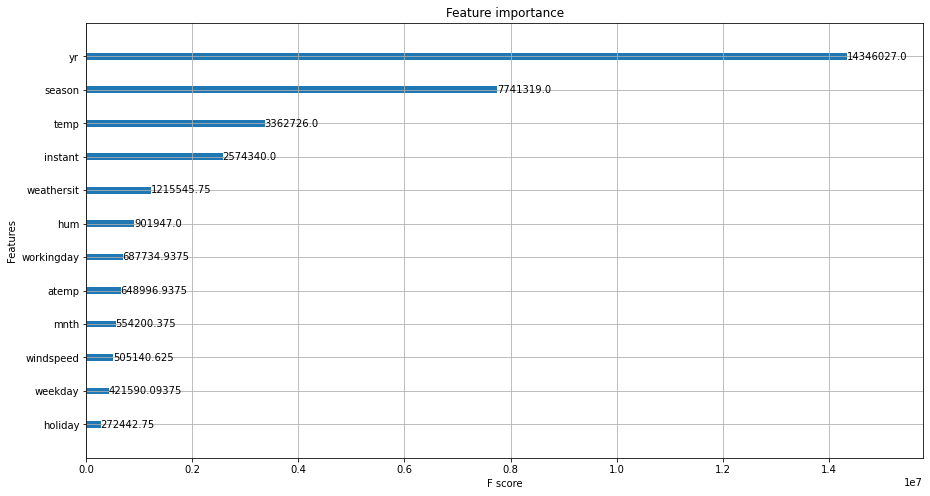

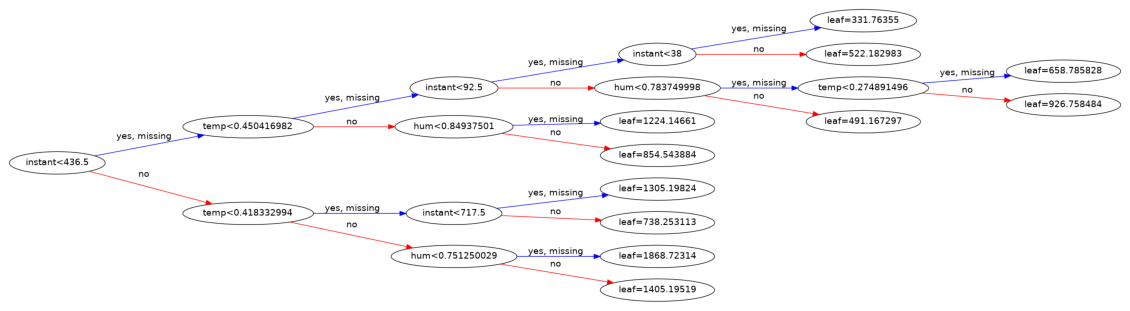

In [32]:
print('Feature Importances:')
print(best_model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
best_model.get_booster().feature_names = feature_data.feature_names
best_model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(best_model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(best_model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

### HPO (book recommendation)

In [33]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02, subsample=0.75, random_state=2)

xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)**0.5

print("RMSE: %0.2f" % (rmse))

RMSE: 584.34
